<h1> Matriz de confusión y reporte de métricas</h1>

El objetivo del presente **notebook** es presentar un conjunto de métricas que sirven para medir el desempeño de un modelo de clasificación.

<center>
    <table>
        <tr>
            <td>
            </td>
            <td>
                Positive
            </td>
            <td>
                Negative
            </td>
            <td>
            </td>
        </tr>
        <tr>
            <td>
                Positive
            </td>
            <td>
                True Positive (<b>TP</b>)
            </td>
            <td>
                False Negative (<b>FN</b>)
            </td>
            <td>
                <i>Recall</i>
            </td>
        </tr>
        <tr>
            <td>
                Negative
            </td>
            <td>
                False Positive (<b>FP</b>)
            </td>
            <td>
                True Negative (<b>TN</b>)
            </td>
            <td>
                <i>Specificity</i>
            </td>
        </tr>
        <tr>
            <td>
            </td>
            <td>
                <i>Precision</i>
            </td>
            <td>
            </td>
            <td>
                <i>Accuracy</i>
            </td>
        </tr>
    </table>
</center>

Las métricas esenciales para resumir el comportamiento de un modelo son:
<dd>
    <dl><b>True Positive</b> (Verdadero positivo)</dl>
    <dl><b>True Negative</b> (Verdadero negativo)</dl>
    <dl><b>False Positive</b> (Falso positivo)</dl>
    <dl><b>False negative</b> (Falso negativo)</dl>
</dd>

En la siguiente tabla se muestran las combinaciones de las salidas y etiquetas correctas (*True label*) de un problema de clasificación binomial.

<center>
  <table class="default">
    <tr>
      <th>Predicción</th>
      <th>True label</th>
      <th>Tipo</th>
      <th>Descripción</th>
    </tr>
    <tr>
      <td>Verdadero</td>
      <td>Verdadero</td>
      <td>True Positive</td>
      <td>Se predijo Verdadero y es Verdadero</td>
    </tr>
    <tr>
      <td>Falso</td>
      <td>Falso</td>
      <td>True Negative</td>
      <td>Se predijo Falso y es Falso</td>
    </tr>
    <tr>
      <td>Verdadero</td>
      <td>Falso</td>
      <td>False Positive</td>
      <td>Se predijo Verdadero y es Falso</td>
    </tr>
    <tr>
      <td>Falso</td>
      <td>Verdadero</td>
      <td>False Negative</td>
      <td>Se predijo Falso y es Verdadero</td>
    </tr>
  </table>
</center>


In [ ]:
# Cargar el framework tensorflow y verificar su versión

import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Se importa el dataset MNIST
digit_mnist = tf.keras.datasets.mnist

# Se cargan los conjuntos de entrenamiento (*_train_whole) y de validación (*_test) en variables separadas
(X_train_whole, y_train_whole), (X_test, y_test) = digit_mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Impresión del número de imagenes del conjunto de entrenamiento y validación

print(f'Numero de imagenes para entrenamiento {X_train_whole.shape[0]}, de tamaño {X_train_whole.shape[1]}x{X_train_whole.shape[2]}')

Numero de imagenes para entrenamiento 60000, de tamaño 28x28


<h1> Dataset </h1>

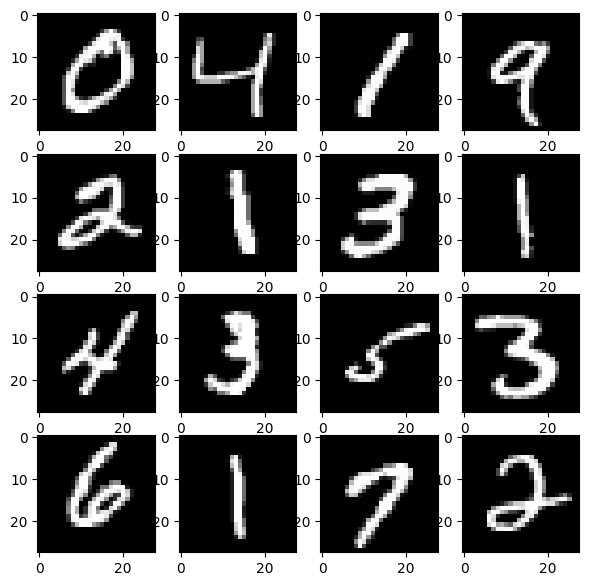

In [ ]:
import matplotlib.pyplot as plt

# Tamaño de la figura
w = 7
h = 7

# Número de columnas y filas del subplot
cols = 4
rows = 4

# Creación de la figura
fig = plt.figure(figsize=(w, h))

for i in range(1, cols*rows+1):
  img = X_train_whole[i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img, cmap="gray")
plt.show()

<h1> Distribución de los datos del dataset </h1>

In [ ]:
# Ejercicio grafique la distribución del dataset

<h1>Dividir X_train_whole y y_train_whole</h1>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_whole, y_train_whole, test_size=0.2, random_state=42)
print(f'Número de elementos para entrenar {X_train.shape[0]}')
print(f'Número de elementos para validar {X_valid.shape[0]}')

Número de elementos para entrenar 48000
Número de elementos para validar 12000


<h2>Normalización de datos</h2>

Los datos se redimensionan en un rango de 0 a 1.

In [ ]:
# Conjuntos de entrenamiento y validación para generar el modelo
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Conjunto de pruebas
X_test = X_test / 255.0

<h1>Definición de la arquitectura</h1>

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Codigo para definir un modelo
layers = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Capa_entrada"),
    tf.keras.layers.Dense(300, activation='relu', name="Capa_oculta"),
    tf.keras.layers.Dense(10, activation='softmax', name="Capa_salida")
]

model = tf.keras.Sequential(layers, name="Mnist_model")

In [ ]:
model.summary()

Model: "Mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_entrada (Flatten)      (None, 784)               0         
                                                                 
 Capa_oculta (Dense)         (None, 300)               235500    
                                                                 
 Capa_salida (Dense)         (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1>Compilar red</h1>

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = "sgd",
              metrics = ["accuracy"]
              )

<h1>Entrenamiento del modelo</h1>

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    validation_data=(X_valid, y_valid),
    verbose=1,
    batch_size=32)

Epoch 1/25
1500/1500 [==============================] - 14s 7ms/step - loss: 0.6876 - accuracy: 0.8309 - val_loss: 0.3909 - val_accuracy: 0.8961
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3525 - accuracy: 0.9025 - val_loss: 0.3169 - val_accuracy: 0.9120
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3008 - accuracy: 0.9150 - val_loss: 0.2806 - val_accuracy: 0.9219
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2690 - accuracy: 0.9244 - val_loss: 0.2556 - val_accuracy: 0.9283
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2455 - accuracy: 0.9310 - val_loss: 0.2408 - val_accuracy: 0.9315
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2264 - accuracy: 0.9368 - val_loss: 0.2226 - val_accuracy: 0.9388
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2100 - accuracy: 0.9415 - val_loss: 0.2080 - val_accuracy

<h1>Evaluación del modelo</h1>

<b>model.evaluate</b><br>

Retorna el valor de pérdida y los valores de las métricas del modelo. Sus argumentos de entrada son el dataset de prueba.


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9687


[0.10679110139608383, 0.9686999917030334]

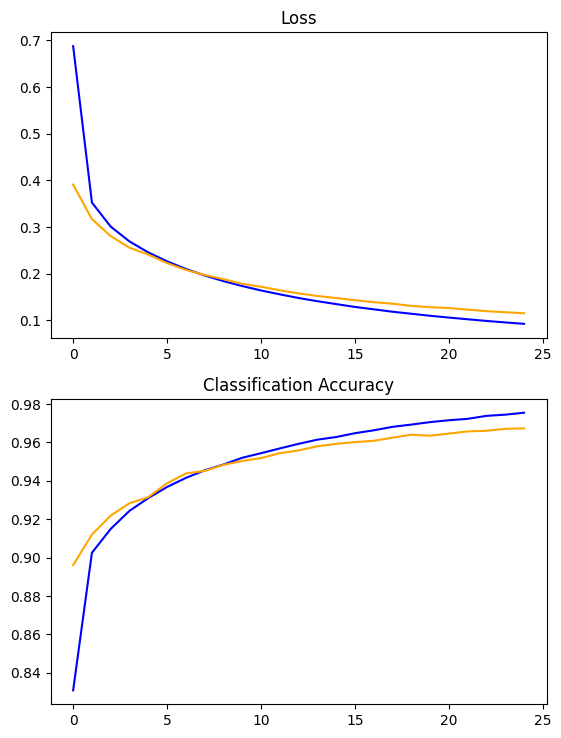

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.subplot(211)
# plot loss
plt.title('Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')

# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

plt.subplots_adjust(bottom=0, top=1.4)

<h1>Predicciones</h1>

In [ ]:
import numpy as np

class_label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Ejercicio realizar las predicciones con X_test
class_= model.predict(X_test)
classes = np.argmax(class_, axis = 1)

313/313 [==============================] - 1s 2ms/step


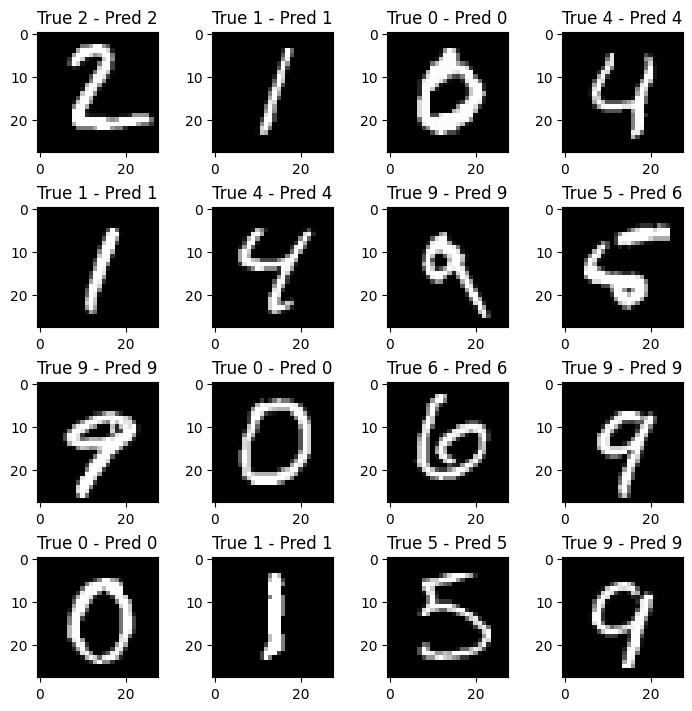

In [ ]:
# Tamaño de la figura
w = 7
h = 7

# Número de columnas y filas del subplot
cols = 4
rows = 4

# Creación de la figura
fig = plt.figure(figsize=(w, h), constrained_layout=True)

for i in range(1, cols*rows+1):
  img = X_test[i]
  ax = fig.add_subplot(rows, cols, i)
  plt.imshow(img, cmap="gray")
  ax.title.set_text('True ' + str(y_test[i])+' - Pred '+str(class_label[classes[i]]))
plt.show()

<h1>Métricas para evaluar el desempeño de un modelo de clasificación</h1>

Las métricas que se pueden utilizar son:
*   *Precision*
*   *Recall*
*   *F1-score*
*   *Confusion matrix*

<h2>Matriz de confusión</h2>

Presenta de manera visual el desempeño de un modelo sobre un conjunto de datos (**test_set**). Los valores que se muestran representan el número de inferencias correctas e incorrectas de cada clase.

In [ ]:
# Calculo de la matriz de confusión con sklearn
#from sklearn.metrics import confusion_matrix
#confusion_mat = confusion_matrix(y_test, classes)


# Calculo de la matriz de confusion con tensorflow
confusion_mtx = tf.math.confusion_matrix(y_test, classes)

[[Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9')],
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')]]

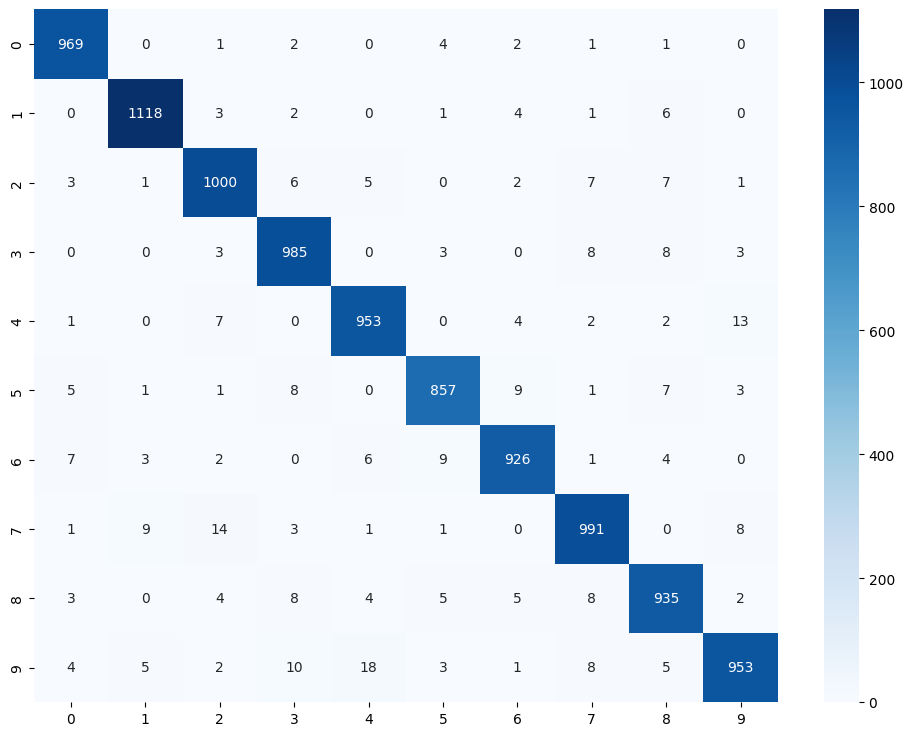

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap=plt.cm.Blues)
c.set(xticklabels=class_label, yticklabels=class_label)

<font color="red">
En la matriz de confusión se puede apreciar que la clase <i>9</i> y la clase <i>4</i> se confunden.
</br>
</font>

Considerar la clase **5** para calcular sus valores *True Positive*, *True negative*, *False Positive* y *False Negative*.

</br>
<h4> True Positive (TP) </h4>
El valor de verdaderos positivos para cada clase se encuentran en la diagonal de la matriz. Para la clase 5, el número de imágenes correctamente predichas es:

$TP = ?$

</br>
<h4> False Negative (FN)</h4>
El valor de los falsos negativos para cada clase se calcula sumando las celdas de la fila, excepto el valor de la diagonal, esto es el valor de los verdaderos positivos. Para la clase 5, la suma queda de la siguiente manera:

$FN = ?$

</br>
<h4> False Positive (FP)</h4>
El valor de falsos positivos para cada clase se calcula sumando las celdas de la columna, excepto el valor de la diagonal, esto es el valor de los verdaderos positivos. Para la clase 5, la suma queda de la siguiente manera:

$FP = ?$

</br>
<h4> True Negative (TN)</h4>
El valor de verdaderos negativos para cada clase se calcula sumando las celdas de las columnas y filas, excepto los valores de la columna y fila de la clase.

$TN = ?$


<h2>Accuracy</h2>

Reporta el desempeño general del modelo

$$
      Accuracy = \frac{\mbox{Inferencias correctas}}{\mbox{Total de inferencias}} = \frac{TP+TN}{TP+FP+FN+TN}
$$

</br>
<b>NOTA</b>: Es una métrica adecuada para datasets balanceados.

<h2> Classification Error Rate </h2>

Es una métrica que reporta la clasificación errónea del modelo, es decir, es una métrica opuesta al <i>accuracy</i>.

$$
  \it{\mbox{Classification Error Rate}} = \frac{FP+FN}{TP+FP+TN+FN}
$$

<h1> Reporte </h1>

<h2>Precision</h2>

Mide la *calidad* del modelo, es decir, cuántas de las predicciones positivas realizadas son correctas (verdaderos positivos). Su fórmula es:

<center>
$Precision = \frac{TP}{TP + FP}$
</center>

<b>NOTA</b> Usar esta métrica cuando el costo de tener falsos positivos es muy alto. Por ejemplo: identificar correos *spam*

<h2>Recall</h2>

Indica la cantidad de casos positivos que son correctos, en otras palabras lo que el modelo es capaz de identificar. Se calcula con la siguiente fórmula:

<center>
$Recall = \frac{TP}{TP+FN}$
</center>

Recall también se conoce como **sensitivity** (sensibilidad) o  **taza de verdaderos positivos**.
</br>
NOTA: En caso de que se deseen evitar falsos negativos, considerar valores altos para esta métrica. Por ejemplo: diagnósticos médicos: cáncer, diabetes, etc .


<h2>F1-score</h2>

**F1-score** combina los valores de *precision* y *recall* y es una "media" de valores. Su fórmula es:

<center>
$F1\mbox{-}score = 2 \frac{precision \cdot recall}{precision + recall}$
</center>

</br>
En algunos casos no puede representar el comportamiento general del modelo, debido a los valores variados de *recall* y *precision*

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classes, target_names=class_label))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<h2>Specificity</h2>

La especificidad mide la proporción de verdaderos negativos y los negativos que son identificados por el modelo.

<center>
    $Specificity = \frac{TN}{FP+TN}$
</center>

Specificity también se conoce como la **taza de falsos negativos**.
</br>
<b>NOTA</b>: Es una métrica adecuada para problemas donde la identificación de datos negativos es de alta prioridad, y el costo por dar un dato positivo puede generar un alto costo. Por ejemplo: detección de fraudes o de drogas.

In [ ]:
np_mat = confusion_mtx.numpy()

df = pd.DataFrame(np_mat)

In [ ]:
number = 3

# Verdaderos negativos (TN)
mat_TN = df.drop(number, axis=1).drop(number, axis=0)
_TN = mat_TN.sum().sum()

# Falsos positivos (FP)
_FP = df[number].sum()-df.iloc[number][number]

In [ ]:
Specificity = _TN / (_TN + _FP)

In [ ]:
print(Specificity)

0.9956618464961068


Referencias:
1. https://towardsdatascience.com/understanding-common-classification-metrics-titanic-style-8b8a562d3e32
2. https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3